# Project 1

## Performing analysis of meteorological data - by Atharva Patil


<b>Objective</b> - Perform Data Cleaning, Perform Analysis for Testing the (given) Hypothesisand finally put-forth your conclusion by writing a blog article.

Data Source:- https://www.kaggle.com/muthuj7/weather-dataset

The Meteorological Dataset Consists of:

        - Total Number of Data Point: 96453
        - Total Number of Attribute/Columns in data set is 11.
        
Attribute Information:

        1. Formatted Date
        2. Summary
        3. Precip Type
        4. Temperature (C)
        5. Apparent Temperature (C)
        6. Humidity
        7. Wind Speed (km/h)
        8. Wind Bearing (degrees)
        9. Visibility (km)
        10. Pressure (millibars)
        11. Daily Summary

## Loading the Data

In [1]:
#Import Statements
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
#Storing and viewing the csv file
df = pd.read_csv("weatherHistory.csv")
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
# Dataset Shape
df.shape

(96453, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [10]:
#Missing Values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

# Observations:

        1. In Precip Type column there are 517 missing values
        2. 'Wind Bearing (degrees)' has only integer values and Formatted Date is in String.
        3. Minimum values of Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km) are Zero and they can be 
        Zero.

In [11]:
#Changing Formatted Date from String to Datetime
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [12]:
#Viewing Formatted Date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

In [13]:
df.sample(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
32903,2009-10-31 23:00:00+00:00,Partly Cloudy,rain,0.555556,0.555556,0.92,0.0000,0.0,4.9910,0.0,1028.50,Foggy starting overnight continuing until morn...
15074,2007-05-27 01:00:00+00:00,Partly Cloudy,rain,17.800000,17.800000,0.82,6.6332,158.0,15.8263,0.0,1004.95,Partly cloudy throughout the day.
59828,2012-11-05 20:00:00+00:00,Mostly Cloudy,rain,8.794444,5.188889,0.89,27.7403,280.0,14.9086,0.0,1005.68,Mostly cloudy throughout the day and breezy st...
76110,2014-05-14 08:00:00+00:00,Overcast,rain,12.711111,12.711111,0.77,24.8101,350.0,9.9820,0.0,1008.65,Overcast throughout the day and breezy startin...
29350,2009-01-14 21:00:00+00:00,Overcast,snow,-0.050000,-3.616667,0.84,11.0124,304.0,3.6225,0.0,1015.96,Foggy starting overnight continuing until morn...
67362,2013-05-14 17:00:00+00:00,Mostly Cloudy,rain,16.150000,16.150000,0.66,4.7495,351.0,11.2700,0.0,1012.71,Partly cloudy overnight.
73105,2014-01-12 00:00:00+00:00,Partly Cloudy,rain,5.122222,2.205556,0.90,13.2020,211.0,5.9409,0.0,1019.08,Mostly cloudy throughout the day.
15923,2007-11-30 11:00:00+00:00,Overcast,rain,0.094444,-3.338889,0.81,10.5938,184.0,8.0500,0.0,1012.81,Mostly cloudy until evening.
23129,2008-03-27 16:00:00+00:00,Overcast,rain,10.116667,10.116667,0.51,13.0410,122.0,9.9820,0.0,1005.51,Mostly cloudy starting in the morning.
4422,2006-06-11 04:00:00+00:00,Foggy,rain,7.283333,7.283333,1.00,0.2898,70.0,0.2093,0.0,1024.62,Foggy starting overnight continuing until morn...


In [14]:
sum(df.duplicated())

24

In [17]:
#Viewing Duplicates
df_duplicated = df[df.duplicated()]
df_duplicated

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
36072,2010-08-01 22:00:00+00:00,Clear,rain,18.800000,18.800000,0.93,6.2790,270.0,14.9086,0.0,1016.99,Partly cloudy starting in the afternoon contin...
36073,2010-08-01 23:00:00+00:00,Clear,rain,18.222222,18.222222,0.97,6.2790,291.0,14.9086,0.0,1017.09,Partly cloudy starting in the afternoon contin...
36074,2010-08-02 00:00:00+00:00,Clear,rain,18.072222,18.072222,0.98,11.2700,290.0,6.8425,0.0,1013.23,Partly cloudy starting in the afternoon contin...
36075,2010-08-02 01:00:00+00:00,Clear,rain,16.622222,16.622222,0.99,6.4400,300.0,11.9784,0.0,1016.78,Partly cloudy starting in the afternoon contin...
36076,2010-08-02 02:00:00+00:00,Clear,rain,16.094444,16.094444,0.99,3.0751,280.0,11.9784,0.0,1016.67,Partly cloudy starting in the afternoon contin...
36077,2010-08-02 03:00:00+00:00,Clear,rain,15.955556,15.955556,0.99,3.8801,276.0,9.9820,0.0,1016.69,Partly cloudy starting in the afternoon contin...
36078,2010-08-02 04:00:00+00:00,Clear,rain,17.088889,17.088889,1.00,6.4400,310.0,9.9820,0.0,1017.08,Partly cloudy starting in the afternoon contin...
36079,2010-08-02 05:00:00+00:00,Clear,rain,20.822222,20.822222,0.87,3.2200,300.0,9.9820,0.0,1017.27,Partly cloudy starting in the afternoon contin...
36080,2010-08-02 06:00:00+00:00,Clear,rain,23.405556,23.405556,0.74,1.8837,334.0,9.9820,0.0,1017.27,Partly cloudy starting in the afternoon contin...
36081,2010-08-02 07:00:00+00:00,Clear,rain,26.050000,26.050000,0.59,1.5939,5.0,9.9820,0.0,1017.15,Partly cloudy starting in the afternoon contin...


In [18]:
df_duplicated.shape

(24, 12)

# Observation:
 
    - There are no Duplicate Values in Dataset

In [19]:
df.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [21]:
df_null = df[df.isna().any(axis=1)]
df_null.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 14:00:00+00:00,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,0.0,1002.40,Mostly cloudy until night.
52674,2012-04-11 16:00:00+00:00,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,0.0,1001.79,Mostly cloudy until night.
52675,2012-04-11 17:00:00+00:00,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,0.0,1001.60,Mostly cloudy until night.
52677,2012-04-11 19:00:00+00:00,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,0.0,1001.92,Mostly cloudy until night.
52678,2012-04-11 20:00:00+00:00,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,0.0,1002.20,Mostly cloudy until night.


In [22]:
df_null.tail(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
95584,2016-10-31 18:00:00+00:00,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.0,0.0,1021.73,Mostly cloudy starting in the afternoon.
95585,2016-10-31 19:00:00+00:00,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.0,0.0,1021.76,Mostly cloudy starting in the afternoon.
95586,2016-10-31 20:00:00+00:00,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.0,0.0,1021.81,Mostly cloudy starting in the afternoon.
95587,2016-10-31 21:00:00+00:00,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.0,0.0,1021.83,Mostly cloudy starting in the afternoon.
95588,2016-10-31 22:00:00+00:00,Mostly Cloudy,NaN,6.322222,4.588889,0.91,8.4686,299.0,0.0,0.0,1021.80,Mostly cloudy starting in the afternoon.


In [23]:
df_target = df.dropna()

In [24]:
df_target.shape

(95936, 12)

In [25]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95936 non-null  datetime64[ns, UTC]
 1   Summary                   95936 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           95936 non-null  float64            
 4   Apparent Temperature (C)  95936 non-null  float64            
 5   Humidity                  95936 non-null  float64            
 6   Wind Speed (km/h)         95936 non-null  float64            
 7   Wind Bearing (degrees)    95936 non-null  float64            
 8   Visibility (km)           95936 non-null  float64            
 9   Loud Cover                95936 non-null  float64            
 10  Pressure (millibars)      95936 non-null  float64            
 11  Daily Summary  

In [26]:
df_target.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [27]:
df_target = df_target.set_index("Formatted Date")
df_target

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.


<b>Giver:</b>

The <b> Null Hypothesis H0</b> is <b>"Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".</b>

The <b> Alternative Hypothesis H1</b> is <b>"Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming".</b>

In [28]:
#Creating new DataFrame only for Apparent Temperature and Humidity
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df_target[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


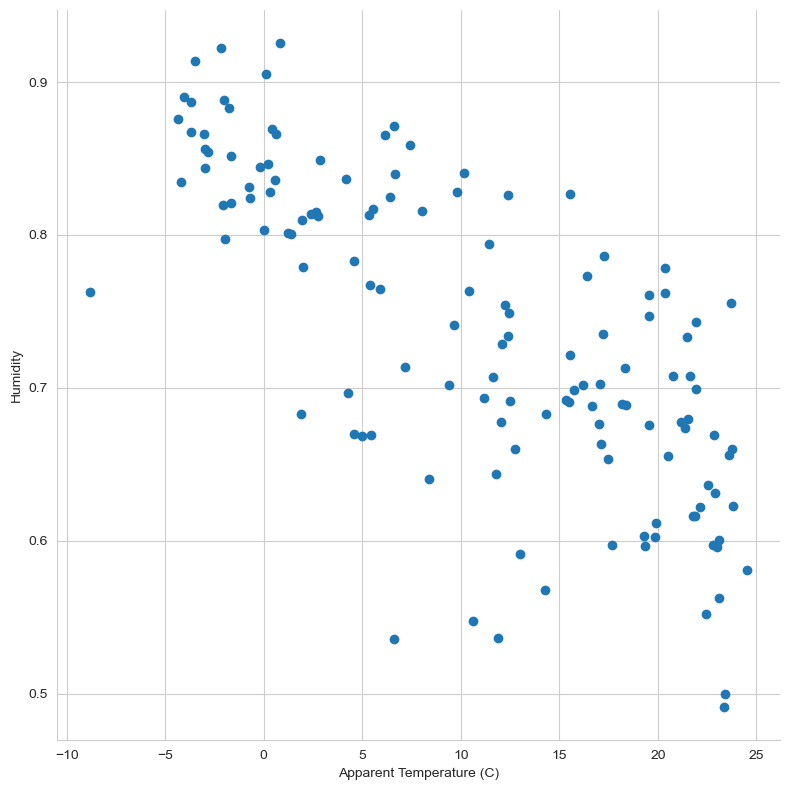

In [29]:
sns.set_style("whitegrid")
sns.FacetGrid(df_monthly_mean, height=8).map(plt.scatter, "Apparent Temperature (C)", "Humidity")
plt.show()

Observation
    
    There can be or may be Linear Relationship between "Humidity" and "Apparent Temperature (C)" with negative slope.

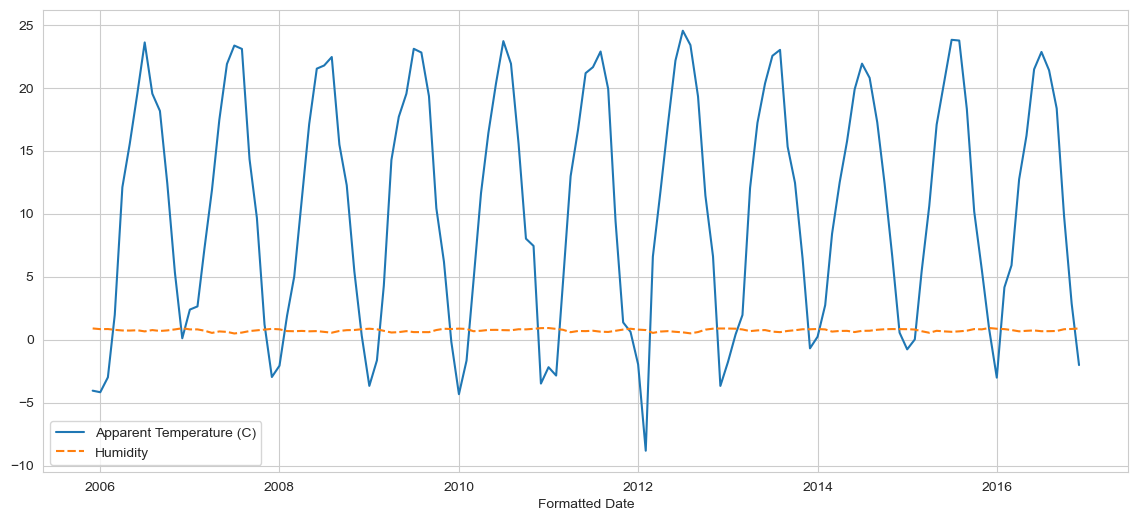

In [30]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.show()

Observation

        1. Humidity doesn't change from 2006-2016
        2. Apparent tempreature changes frequently from 2006-2016

## 2D Scatter Plot with Color Coding for each Summary type.

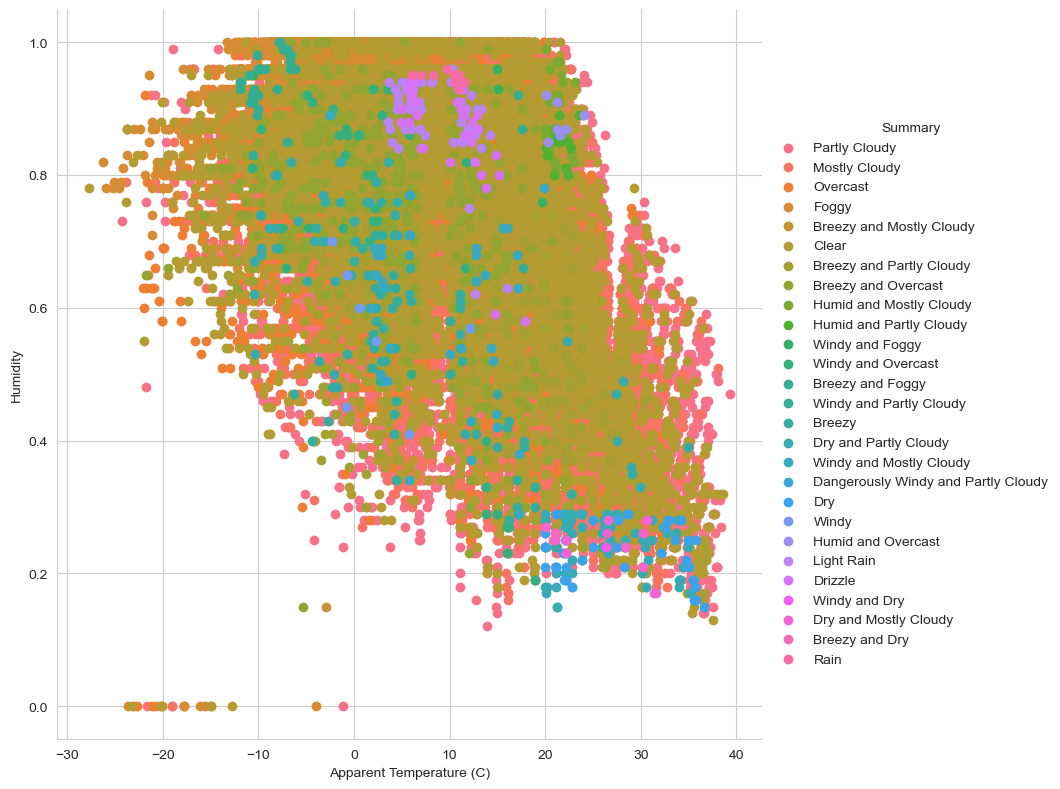

In [31]:
sns.set_style("whitegrid")
sns.FacetGrid(df_target, hue="Summary", height=8).map(plt.scatter, "Apparent Temperature (C)", "Humidity").add_legend()
plt.show()

Observation:

    1. Almost no outliers
    2. In Finland weather is mostly clear, partly cloudy, rain or dry
    3. Only few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.
    

### Univariate Analysis using PDF:

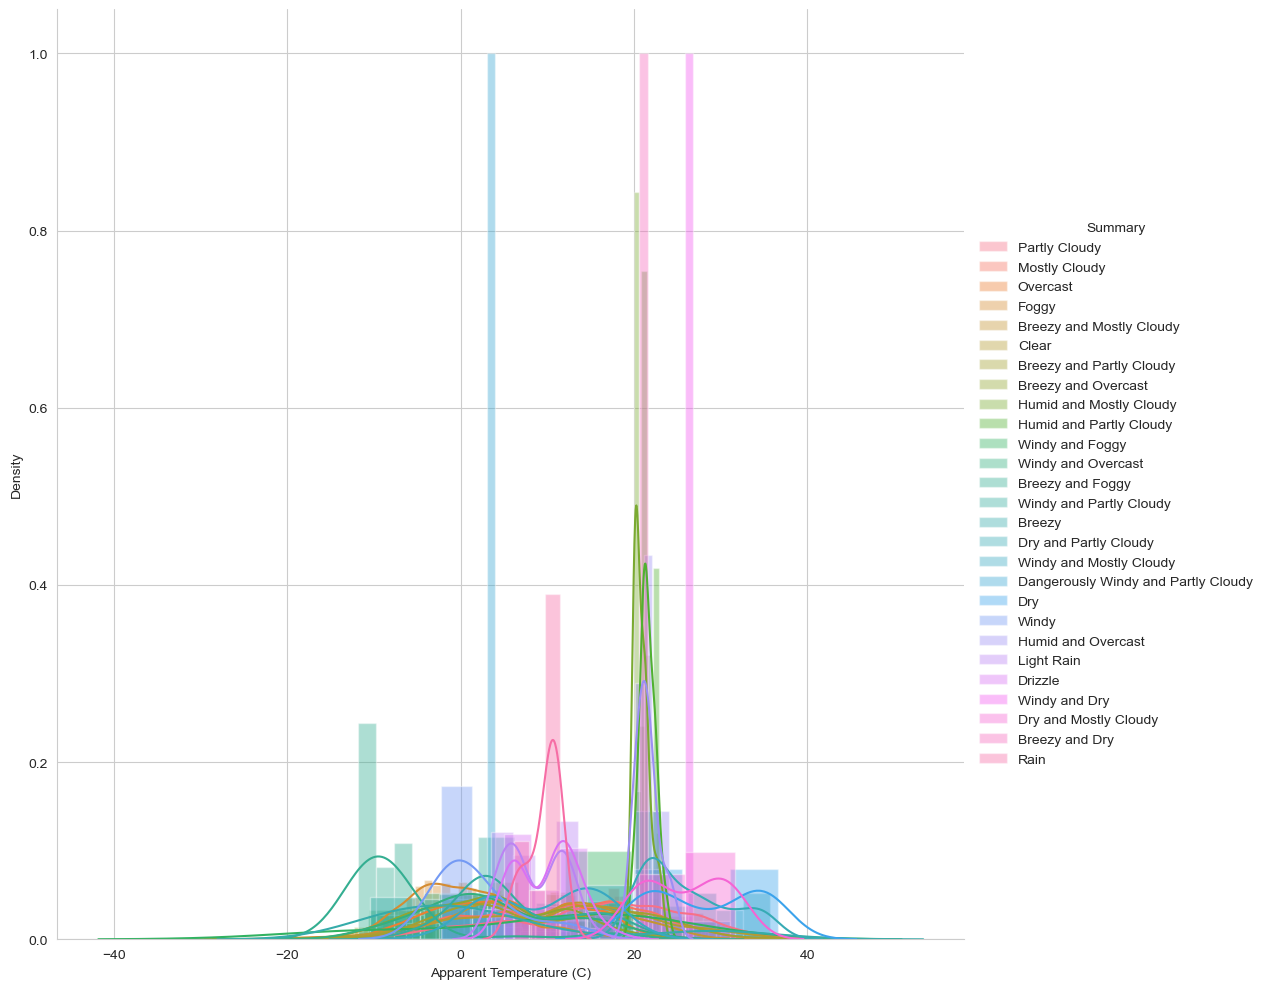

In [35]:
# For Humidity
sns.FacetGrid(df_target, hue="Summary", height=10).map(sns.distplot, "Apparent Temperature (C)").add_legend()
plt.show()

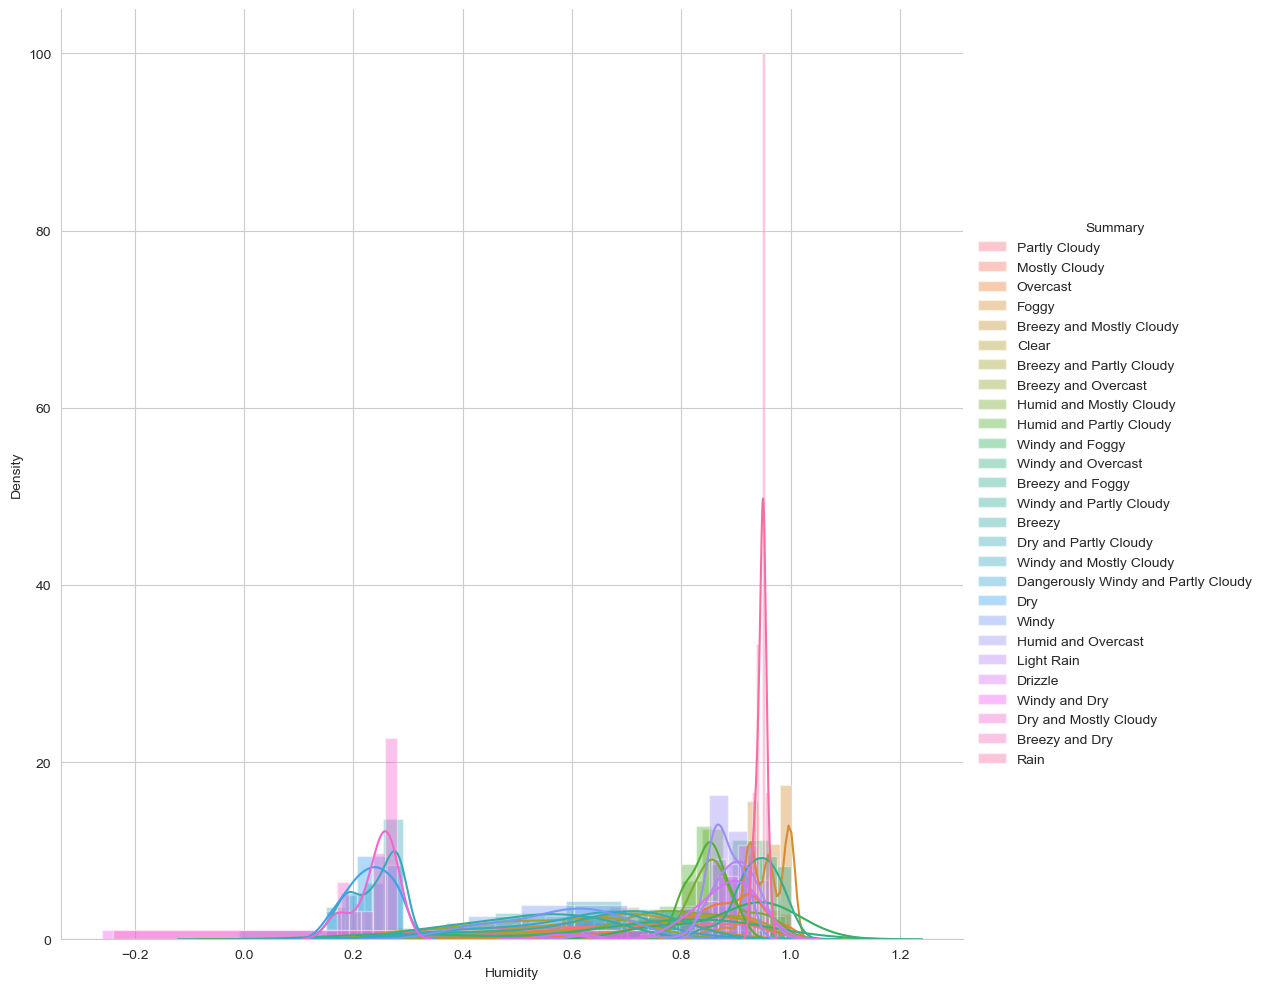

In [34]:
# For Humidity
sns.FacetGrid(df_target, hue="Summary", height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

Observation:
    
    Humidity is better than Apparent Temperature
    

## Conclusion:

    H0 is not accepted because there is no change in Humidity from 2006–2016. So, we will accept the H1.